In [1]:
!pip install xlrd
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 여기 실행하고  런타임 재시작 해야함
!pip install --upgrade openpyxl
!pip install --upgrade pandas
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##IPC 전처리

In [ ]:
patent = pd.read_excel("/content/patent_ipc.xls")

In [ ]:
patent_ipc = patent[["IPC분류"]]

In [ ]:
patent_ipc

,IPC분류
0,"G06K9/00,G06K9/62,G06N3/08,G06N3/04,G06N20/20,..."
1,"B60W60/00,G06K9/62,G06K9/32,G06N3/08"
2,"B60W60/00,G06K9/62,G06N3/08,G06K9/32"
3,"B60W60/00,B60W40/11,B60W40/112,B60W40/114,B60W..."
4,"G05D1/00,G05B13/00,G08G1/16,G06K5/00,G06K7/00,..."
...,...
712,G06N3/08
713,"G01S17/894,G01S17/931,G01S7/48,G01S17/58"
714,"A47L9/28,A47L7/00"
715,"G06F40/295,G06F40/30,G06N20/00,G06N5/02,G06F40..."


In [ ]:
#ipc 리스트로 분류하는 과정 관찰용
patent_ipc["IPC분류"].map(lambda x : x.split(",")).tolist()

[['G06K9/00',
  'G06K9/62',
  'G06N3/08',
  'G06N3/04',
  'G06N20/20',
  'G06T7/00',
  'G06T7/20',
  'G01S17/89'],
 ['B60W60/00', 'G06K9/62', 'G06K9/32', 'G06N3/08'],
 ['B60W60/00', 'G06K9/62', 'G06N3/08', 'G06K9/32'],
 ['B60W60/00',
  'B60W40/11',
  'B60W40/112',
  'B60W40/114',
  'B60W50/04',
  'G06N3/04',
  'G06N3/08'],
 ['G05D1/00',
  'G05B13/00',
  'G08G1/16',
  'G06K5/00',
  'G06K7/00',
  'G06N20/00',
  'G05D1/02',
  'G05B13/02'],
 ['B60W60/00',
  'H04N7/18',
  'G06K9/00',
  'G06N3/08',
  'G05D1/02',
  'G05D1/00',
  'G01S13/86'],
 ['G05D1/00', 'G05B13/02', 'G05D1/02'],
 ['B60W50/00', 'G05D1/00', 'B60W40/04'],
 ['B60W60/00', 'B60W40/105', 'B60W10/20', 'G06N3/04', 'G06N3/08'],
 ['B60W60/00',
  'H04W4/40',
  'B60W30/095',
  'G06K9/00',
  'G06K9/62',
  'G06N3/04',
  'G06N3/08'],
 ['G06K9/62', 'G06K9/00', 'G06N3/04', 'G06N3/08', 'G05D1/00'],
 ['G06K9/62', 'G06K9/00', 'G06N3/08', 'G05D1/00', 'G06N3/04'],
 ['G08G1/00', 'H04W4/46', 'G08B25/01'],
 ['G06T5/50',
  'G06T7/70',
  'B60W60/00',

In [ ]:
#  위의 리스트 개별 요소를 한개씩 분리해냄, 이 과정에서 :4 부분으로 ipc를 4글자로 자름
edge_list = []
for data in zip(range(patent_ipc.shape[0]),patent_ipc["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
edge_list[:10]

[[0, 'G06K'],
 [0, 'G06K'],
 [0, 'G06N'],
 [0, 'G06N'],
 [0, 'G06N'],
 [0, 'G06T'],
 [0, 'G06T'],
 [0, 'G01S'],
 [1, 'B60W'],
 [1, 'G06K']]

In [ ]:
df_edge_list = pd.DataFrame(edge_list)
df_edge_list

,0,1
0,0,G06K
1,0,G06K
2,0,G06N
3,0,G06N
4,0,G06N
...,...,...
3529,715,G06N
3530,715,G06F
3531,716,G06F
3532,716,G06N


In [ ]:
df_edge_list["rating"] = 1

df_edge_list.groupby([0,1])["rating"].sum()


0    1   
0    G01S    1
     G06K    2
     G06N    3
     G06T    2
1    B60W    1
            ..
714  A47L    2
715  G06F    3
     G06N    2
716  G06F    1
     G06N    2
Name: rating, Length: 2089, dtype: int64

In [ ]:
#희소 행렬 완성을 위한 코드  4글자로 잘랐으므로 2이상의 값이 있을 수 있음
ipc_preprocess = df_edge_list.groupby([0,1])["rating"].sum().unstack().fillna(0)
ipc_preprocess = ipc_preprocess.astype(int)

In [ ]:
ipc_preprocess

1,A01B,A01D,A47L,A61B,A61G,A61L,B25J,B60H,B60J,B60K,...,H02J,H02K,H02N,H04B,H04L,H04N,H04Q,H04R,H04S,H04W
0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
714,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ipc_preprocess.to_csv("/content/ipc_result.csv")


##word 전처리

In [77]:
patent = pd.read_excel("/content/patent_ab.xls")
patent_ab = patent["발명의명칭"]

In [78]:
patent_ab 

0      MULTIPLE RESOLUTION DEEP NEURAL NETWORKS FOR V...
1      Learning method and learning device for updati...
2      Learning Method and Learning Device for Updati...
3      System and Method for Neural Network-Based Aut...
4      Method of real time vehicle recognition with n...
                             ...                        
712    Data-Driven Methodology for Automatic Detectio...
713             LIDAR TECHNIQUES FOR AUTONOMOUS VEHICLES
714    Method for Automatically Ascertaining Cleaning...
715    Data driven approach for automatically generat...
716    DATA DRIVEN APPROACH FOR AUTOMATICALLY GENERAT...
Name: 발명의명칭, Length: 717, dtype: object

In [79]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
edge_list = []
for i in range(patent_ab.shape[0]):
  #알파벳 제외하고 전부 제거
  only_englishh = re.sub('[^a-zA-Z]', ' ', str(patent_ab[i]))
  #전부 소문자로 
  no_capitals = only_englishh.lower().split()
  #불용어 제거   << 추후에 불용어 추가 가능
  stops = set(stopwords.words('english'))
  no_stops = [word for word in no_capitals if not word in stops]
  #어간 추출  ex) running -> run
  stemmer = nltk.stem.SnowballStemmer('english')
  stemmer_words = [stemmer.stem(word) for word in no_stops]
  #분리된 모든 단어를 리스트로 생성
  alist = []
  for j in stemmer_words:
    alist.append(j)
  edge_list.append([i,alist])

In [86]:
edge_list

[[0,
  ['multipl',
   'resolut',
   'deep',
   'neural',
   'network',
   'vehicl',
   'autonom',
   'drive',
   'system']],
 [1,
  ['learn',
   'method',
   'learn',
   'devic',
   'updat',
   'object',
   'detector',
   'base',
   'deep',
   'learn',
   'autonom',
   'vehicl',
   'adapt',
   'object',
   'detector',
   'drive',
   'circumst',
   'updat',
   'method',
   'updat',
   'devic',
   'use']],
 [2,
  ['learn',
   'method',
   'learn',
   'devic',
   'updat',
   'object',
   'detector',
   'base',
   'deep',
   'learn',
   'autonom',
   'vehicl',
   'adapt',
   'object',
   'detector',
   'drive',
   'circumst',
   'updat',
   'method',
   'updat',
   'devic',
   'use']],
 [3, ['system', 'method', 'neural', 'network', 'base', 'autonom', 'drive']],
 [4,
  ['method',
   'real',
   'time',
   'vehicl',
   'recognit',
   'neuromorph',
   'comput',
   'network',
   'autonom',
   'drive']],
 [5,
  ['vehicl',
   'mount',
   'control',
   'unit',
   'method',
   'apparatus',
   'fpga

In [ ]:
df_edge_list = pd.DataFrame(edge_list)
pd.DataFrame(df_edge_list)

,0,1
0,0,multipl
1,0,resolut
2,0,deep
3,0,neural
4,0,network
...,...,...
5822,716,generat
5823,716,natur
5824,716,languag
5825,716,process


In [ ]:
df_edge_list["rating"] = 1

In [ ]:
#희소 행렬로 제작
word_preprocess = df_edge_list.groupby([0,1])["rating"].sum().unstack().fillna(0)
word_preprocess = word_preprocess.astype(int)


In [ ]:
word_preprocess.to_csv("/content/word_result.csv")

##결과 도출(단어 클러스터링)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
from scipy.cluster.hierarchy import dendrogram, linkage
# word_preprocess ipc_preprocess << 각각 dataframe 변수명

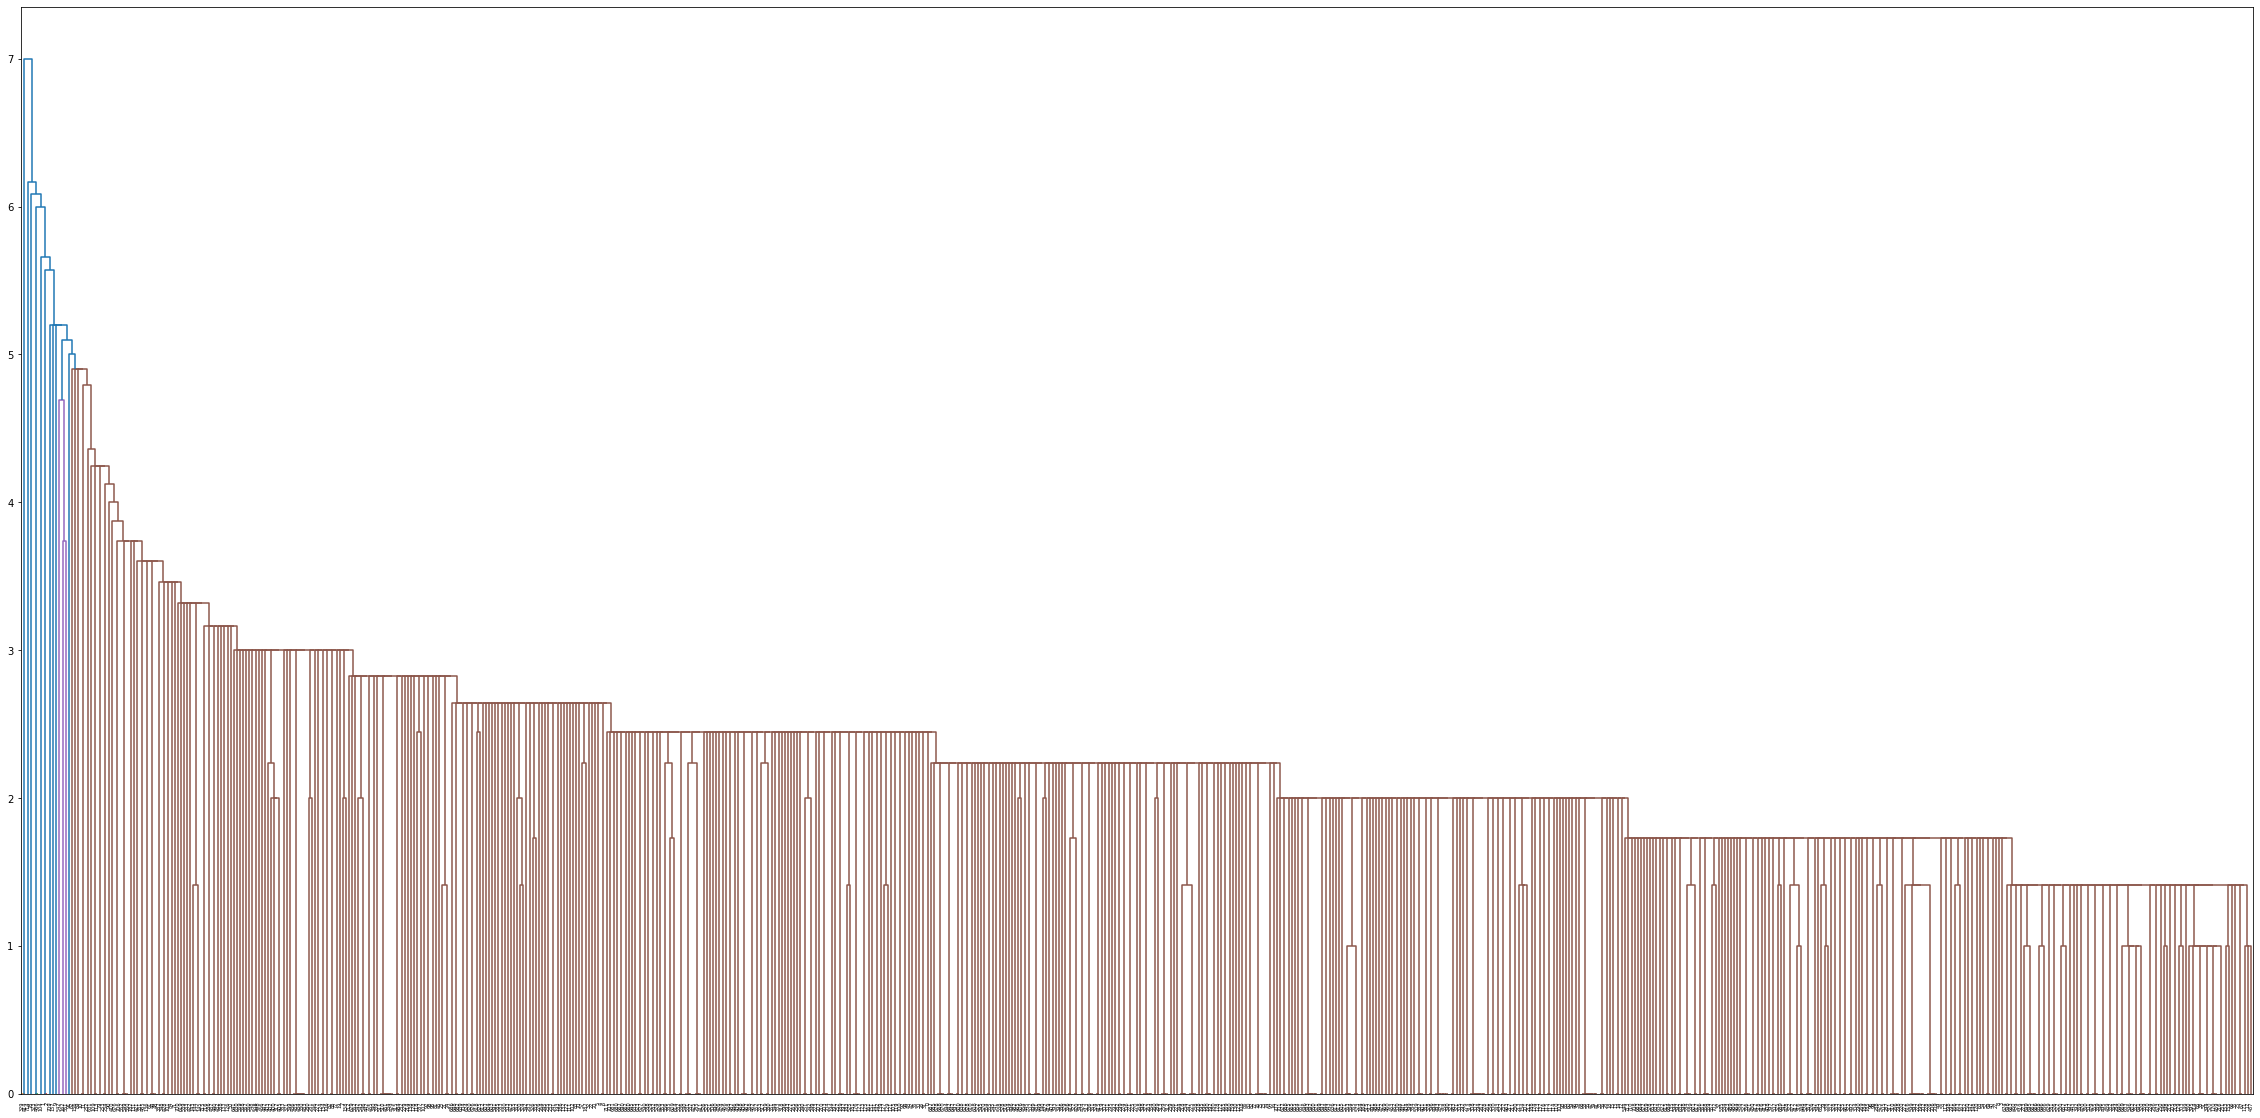

In [ ]:
#하이라키컬 클러스터링을 위한 덴드로그램 확인
linked = linkage(word_preprocess, 'single')
labelList = range(word_preprocess.shape[0])

plt.figure(figsize=(40, 20))
dendrogram(linked)
plt.show()

In [ ]:
#Kmeans 코드
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 4


model = KMeans(n_clusters = k, random_state = 10)
model.fit(word_preprocess)
www = word_preprocess
www['cluster'] = model.fit_predict(word_preprocess)
print(silhouette_score(word_preprocess,model.labels_))

0.10297271371393822


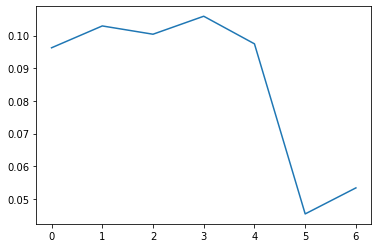

In [ ]:
#실루엣 코드 , 최적의 k 찾기  , 이걸로 찾아서 바로 위의 k 수정
kmeans_per_k = [KMeans(n_clusters=k, random_state=10).fit(word_preprocess)
                for k in range(2, 10)]
silhouette_scores = [silhouette_score(word_preprocess, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.plot(silhouette_scores)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_te

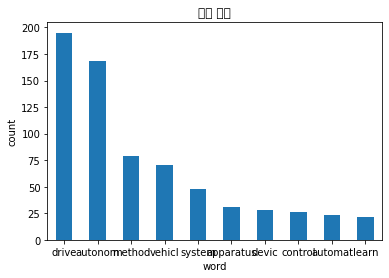

<Figure size 2160x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)


0 번째 군집  1
drive        195
autonom      168
method        79
vehicl        70
system        48
apparatus     31
devic         28
control       26
automat       23
learn         21
dtype: int64 



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0, flags=flags)


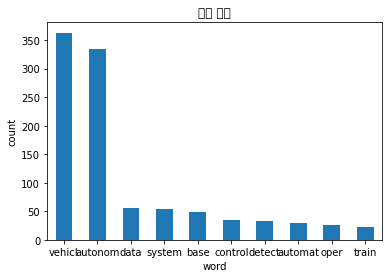

<Figure size 2160x1080 with 0 Axes>

1 번째 군집  1
vehicl     363
autonom    334
data        55
system      54
base        48
control     35
detect      33
automat     30
oper        26
train       22
dtype: int64 



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_te

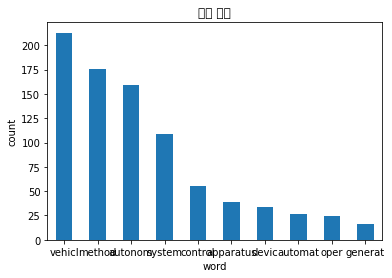

<Figure size 2160x1080 with 0 Axes>

2 번째 군집  1
vehicl       213
method       176
autonom      159
system       109
control       55
apparatus     39
devic         34
automat       27
oper          24
generat       16
dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0, flags=flags)


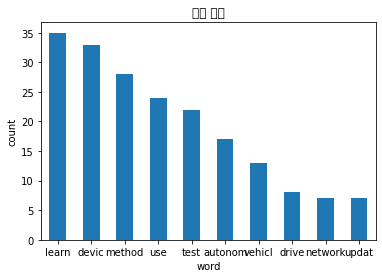

<Figure size 2160x1080 with 0 Axes>

3 번째 군집  1
learn      35
devic      33
method     28
use        24
test       22
autonom    17
vehicl     13
drive       8
network     7
updat       7
dtype: int64 



In [ ]:
#위의 k 수정 후 실행 시 토픽별 단어 시각화
for i in range(k):
  clu = www[www["cluster"] == i]
  clu.sum().drop(['cluster']).sort_values(ascending = False)[:10].plot(kind='bar', rot=0)
  plt.title("단어 군집")
  plt.xlabel("word")
  plt.ylabel("count")
  plt.figure(figsize=(30, 15))
  plt.show()
  print(i,"번째 군집 ",clu.sum().drop(['cluster']).sort_values(ascending = False)[:10],"\n")

## IPC 클러스터링

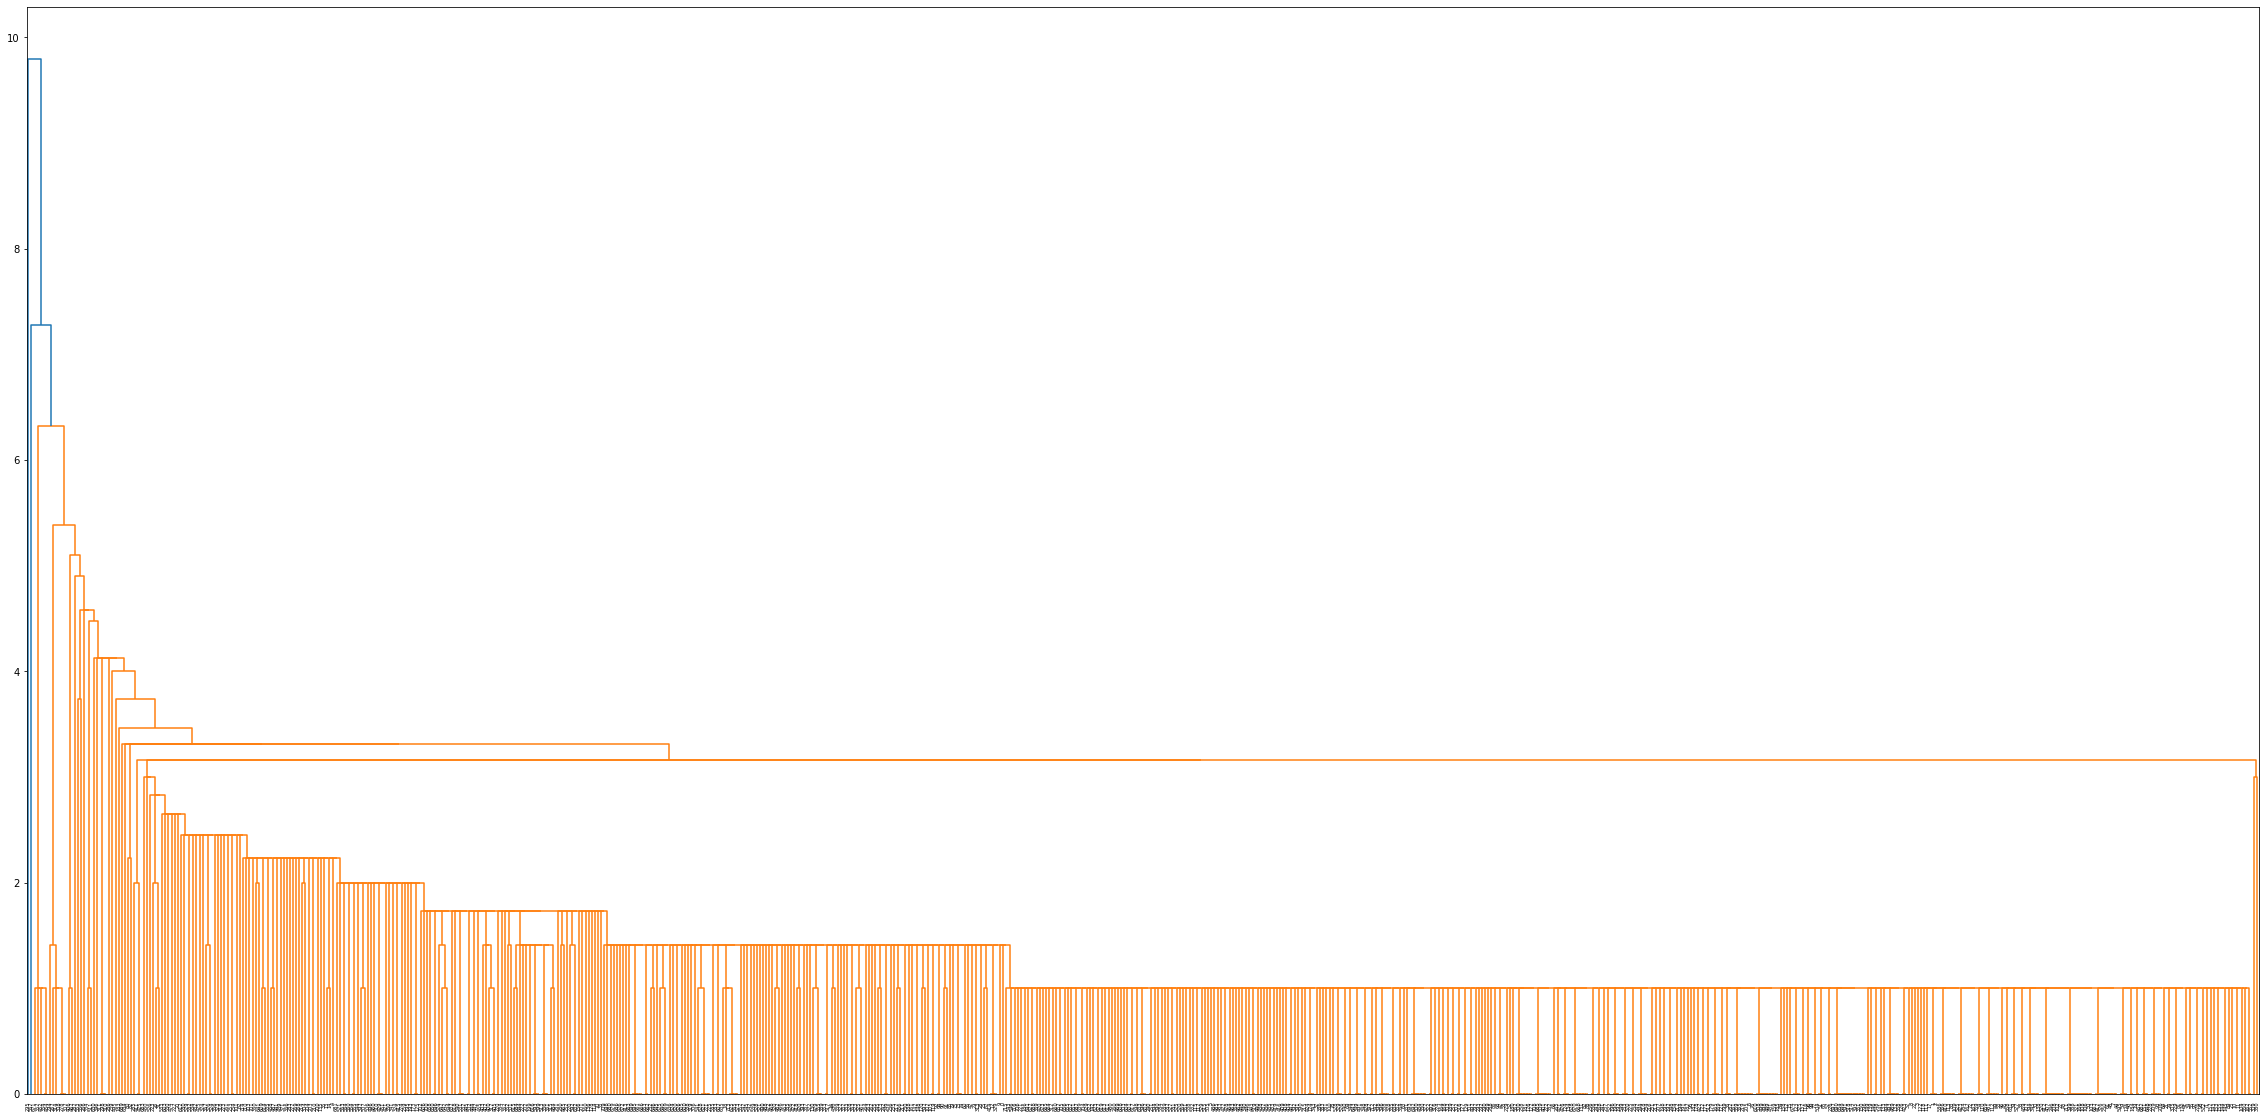

In [ ]:
linked = linkage(ipc_preprocess, 'single')
labelList = range(ipc_preprocess.shape[0])

plt.figure(figsize=(40, 20))
dendrogram(linked)
plt.show()

In [ ]:
ipc_preprocess

1,A01B,A01D,A47L,A61B,A61G,A61L,B25J,B60H,B60J,B60K,...,H02J,H02K,H02N,H04B,H04L,H04N,H04Q,H04R,H04S,H04W
0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
714,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans

k = 4


model = KMeans(n_clusters = k, random_state = 10)
model.fit(ipc_preprocess)
www = ipc_preprocess
www['cluster'] = model.fit_predict(ipc_preprocess)

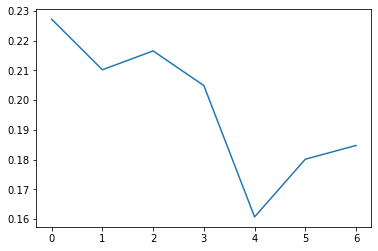

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=10).fit(ipc_preprocess)
                for k in range(2, 10)]
silhouette_scores = [silhouette_score(ipc_preprocess, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.plot(silhouette_scores)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0, flags=flags)


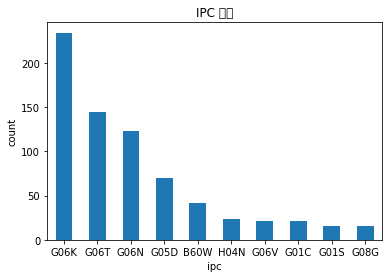

<Figure size 2160x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)


0 번째 군집  1
G06K    234
G06T    144
G06N    123
G05D     70
B60W     42
H04N     23
G06V     21
G01C     21
G01S     16
G08G     16
dtype: int64 



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0, flags=flags)


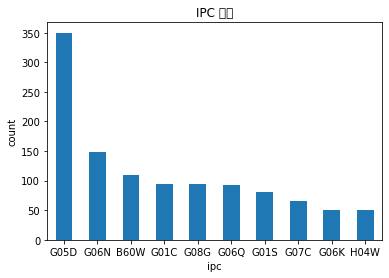

<Figure size 2160x1080 with 0 Axes>

1 번째 군집  1
G05D    350
G06N    148
B60W    110
G01C     94
G08G     94
G06Q     93
G01S     80
G07C     66
G06K     51
H04W     50
dtype: int64 



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0, flags=flags)


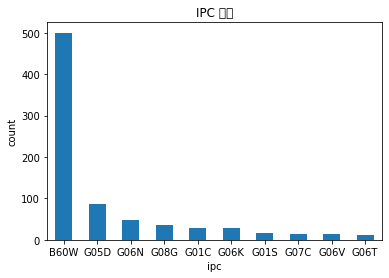

<Figure size 2160x1080 with 0 Axes>

2 번째 군집  1
B60W    500
G05D     87
G06N     48
G08G     35
G01C     29
G06K     28
G01S     17
G07C     14
G06V     13
G06T     11
dtype: int64 



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0, flags=flags)


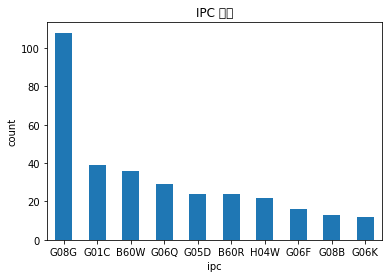

<Figure size 2160x1080 with 0 Axes>

3 번째 군집  1
G08G    108
G01C     39
B60W     36
G06Q     29
G05D     24
B60R     24
H04W     22
G06F     16
G08B     13
G06K     12
dtype: int64 



In [ ]:
for i in range(k):
  clu = www[www["cluster"] == i]
  clu.sum().drop(['cluster']).sort_values(ascending = False)[:10].plot(kind='bar', rot=0)
  plt.title("IPC 군집")
  plt.xlabel("ipc")
  plt.ylabel("count")
  plt.figure(figsize=(30, 15))
  plt.show()
  print(i,"번째 군집 ",clu.sum().drop(['cluster']).sort_values(ascending = False)[:10],"\n")

In [ ]:
clu.sum()

1
A01B        0
A01D        0
A47L        0
A61B        0
A61G        0
           ..
H04Q        0
H04R        0
H04S        0
H04W       22
cluster    51
Length: 66, dtype: int64

## LDA

In [13]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [23]:
patent = pd.read_excel("/content/patent_abab.xls")
patent_abab = patent["요약"]

In [61]:
edge_list = []
for i in range(patent_abab.shape[0]):
  #알파벳 제외하고 전부 제거
  only_english = re.sub('[^a-zA-Z]', ' ', str(patent_abab[i]))
  #전부 소문자로 
  no_capitals = only_english.lower().split()
  #불용어 제거   << 추후에 불용어 추가 가능
  stops = set(stopwords.words('english'))
  no_stops = [word for word in no_capitals if not word in stops]
  #어간 추출  ex) running -> run
  stemmer = nltk.stem.SnowballStemmer('english')
  stemmer_words = [stemmer.stem(word) for word in no_stops]
  #분리된 모든 단어를 리스트로 생성
  alist = []
  for j in stemmer_words:
    if(j == 'vehicl' or j == 'data' or j == 'autonom'):
        continue
    alist.append(j)
  edge_list.append(alist)

In [62]:
tokenized_doc = edge_list
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(6, 1), (9, 2), (10, 6), (11, 2), (13, 1), (27, 3), (29, 1), (30, 2), (31, 1), (32, 18), (33, 1), (34, 2), (35, 1), (36, 2), (37, 1), (38, 4), (39, 2), (40, 1), (41, 5), (42, 3), (43, 2), (44, 1), (45, 1), (46, 2), (47, 1), (48, 7), (49, 2), (50, 5), (51, 1), (52, 3), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 16), (59, 1), (60, 1), (61, 1)]


In [41]:
print(dictionary[2])

captur


In [38]:
dictionary

In [63]:
import gensim
NUM_TOPICS = 8 # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

(0, '0.028*"first" + 0.027*"includ" + 0.021*"one" + 0.020*"determin"')
(1, '0.029*"learn" + 0.026*"system" + 0.022*"control" + 0.021*"oper"')
(2, '0.049*"sensor" + 0.028*"drive" + 0.019*"includ" + 0.018*"one"')
(3, '0.023*"one" + 0.022*"system" + 0.018*"determin" + 0.018*"includ"')
(4, '0.025*"imag" + 0.024*"object" + 0.024*"model" + 0.023*"generat"')
(5, '0.037*"oper" + 0.029*"control" + 0.024*"determin" + 0.023*"may"')
(6, '0.042*"imag" + 0.019*"process" + 0.019*"base" + 0.013*"system"')
(7, '0.021*"configur" + 0.021*"system" + 0.020*"includ" + 0.019*"base"')


In [45]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [47]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [48]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

<ipython-input-47-305aef30e49c>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3,0.7254,"[(0, 0.16611841), (3, 0.72544384), (4, 0.10212..."
1,1,5,0.9925,"[(5, 0.99246633)]"
2,2,5,0.9925,"[(5, 0.99246633)]"
3,3,3,0.7060,"[(2, 0.28698274), (3, 0.70599514)]"
4,4,3,0.5141,"[(1, 0.32036963), (3, 0.51409864), (5, 0.15860..."
5,5,2,0.4132,"[(0, 0.2365579), (1, 0.06102215), (2, 0.413155..."
6,6,3,0.5141,"[(1, 0.32037878), (3, 0.51409817), (5, 0.15859..."
7,7,1,0.9869,"[(1, 0.9868706)]"
8,8,2,0.7367,"[(2, 0.73669446), (5, 0.24407226)]"
9,9,5,0.7074,"[(1, 0.2848039), (5, 0.70735943)]"


In [70]:
patent_ab[]

,발명의명칭
0,MULTIPLE RESOLUTION DEEP NEURAL NETWORKS FOR V...
1,Learning method and learning device for updati...
2,Learning Method and Learning Device for Updati...
3,System and Method for Neural Network-Based Aut...
4,Method of real time vehicle recognition with n...
...,...
712,Data-Driven Methodology for Automatic Detectio...
713,LIDAR TECHNIQUES FOR AUTONOMOUS VEHICLES
714,Method for Automatically Ascertaining Cleaning...
715,Data driven approach for automatically generat...


In [82]:
edge_list

[[0, 'multipl'],
 [0, 'resolut'],
 [0, 'deep'],
 [0, 'neural'],
 [0, 'network'],
 [0, 'vehicl'],
 [0, 'autonom'],
 [0, 'drive'],
 [0, 'system'],
 [1, 'learn'],
 [1, 'method'],
 [1, 'learn'],
 [1, 'devic'],
 [1, 'updat'],
 [1, 'object'],
 [1, 'detector'],
 [1, 'base'],
 [1, 'deep'],
 [1, 'learn'],
 [1, 'autonom'],
 [1, 'vehicl'],
 [1, 'adapt'],
 [1, 'object'],
 [1, 'detector'],
 [1, 'drive'],
 [1, 'circumst'],
 [1, 'updat'],
 [1, 'method'],
 [1, 'updat'],
 [1, 'devic'],
 [1, 'use'],
 [2, 'learn'],
 [2, 'method'],
 [2, 'learn'],
 [2, 'devic'],
 [2, 'updat'],
 [2, 'object'],
 [2, 'detector'],
 [2, 'base'],
 [2, 'deep'],
 [2, 'learn'],
 [2, 'autonom'],
 [2, 'vehicl'],
 [2, 'adapt'],
 [2, 'object'],
 [2, 'detector'],
 [2, 'drive'],
 [2, 'circumst'],
 [2, 'updat'],
 [2, 'method'],
 [2, 'updat'],
 [2, 'devic'],
 [2, 'use'],
 [3, 'system'],
 [3, 'method'],
 [3, 'neural'],
 [3, 'network'],
 [3, 'base'],
 [3, 'autonom'],
 [3, 'drive'],
 [4, 'method'],
 [4, 'real'],
 [4, 'time'],
 [4, 'vehicl'],
